# Programming assignments week 2

### Small Fibonacci number

Task. Given an integer 𝑛, find the 𝑛th Fibonacci number $𝐹_𝑛$. 

Input Format. The input consists of a single integer 𝑛. 

Constraints. 0 ≤ 𝑛 ≤ 45.

Output Format. Output $𝐹_𝑛$.

In [42]:
def calc_fib(n):
    if (n <= 1):
        return n
    else:
        a, b = 0, 1
        for i in range(n-1):
            b, a = b + a, b
        return b

n = int(input())
print(calc_fib(n))

45
1134903170


### Fibonacci last digit
Task. Given an integer 𝑛, find the last digit of the 𝑛th Fibonacci number $𝐹_𝑛$ (that is, $𝐹_𝑛$ mod 10). 

Input Format. The input consists of a single integer 𝑛.

Constraints. 0 ≤ 𝑛 ≤ $10^7$.

Output Format. Output the last digit of $𝐹_𝑛$.

In [61]:
def get_fibonacci_last_digit(n):
    if n <= 1:
        return n
    previous = 0
    current  = 1

    for _ in range(n - 1):
        previous, current = current%10, previous%10 + current
    return current % 10

In [67]:
%%timeit
get_fibonacci_last_digit(331)

10000 loops, best of 3: 33.8 µs per loop


### Greatest Common Divisor 
Task. Given two integers 𝑎 and 𝑏, find their greatest common divisor.

Input Format. The two integers 𝑎, 𝑏 are given in the same line separated by space. 

Constraints. 1≤𝑎,𝑏≤2·$10^9$.

Output Format. Output GCD(𝑎, 𝑏).

In [83]:
def gcd_naive(a, b):
    current_gcd = 1
    for d in range(2, min(a, b) + 1):
        if a % d == 0 and b % d == 0:
            if d > current_gcd:
                current_gcd = d
    return current_gcd

In [78]:
def Euclid_gcd(a, b):
    if b == 0:
        return a
    else:
        a = a%b
    return Euclid_gcd(b, a)

In [80]:
%%timeit
Euclid_gcd(30, 12)

The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 481 ns per loop


In [84]:
%%timeit
gcd_naive(30, 12)

1000000 loops, best of 3: 1.66 µs per loop


In [85]:
Euclid_gcd(28851538, 1183019)

17657

### Least Common Multiple
The least common multiple of two positive integers 𝑎 and 𝑏 is the least positive integer 𝑚 that is divisible by both 𝑎 and 𝑏.

Task. Given two integers 𝑎 and 𝑏, find their least common multiple.

Input Format. The two integers 𝑎 and 𝑏 are given in the same line separated by space.

Constraints. 1≤𝑎,𝑏≤2·$10^9$.

Output Format. Output the least common multiple of 𝑎 and 𝑏.

In [86]:
def lcm_naive(a, b):
    for l in range(1, a*b + 1):
        if l % a == 0 and l % b == 0:
            return l

    return a*b

In [95]:
def lcm(a, b):
    gcd = Euclid_gcd(a, b)
    lcm = a * b / gcd
    return int(lcm)

In [94]:
lcm(6, 8)

24

### Huge Fibonacci Number modulo m

Task. Given two integers 𝑛 and 𝑚, output $𝐹_𝑛$ mod 𝑚 (that is, the remainder of $𝐹_𝑛$ when divided by 𝑚). 

Input Format. The input consists of two integers 𝑛 and 𝑚 given on the same line (separated by a space). 

Constraints. 1≤𝑛≤$10^{18}$, 2≤𝑚≤$10^5$.

Output Format. Output $𝐹_𝑛$ mod 𝑚.

In [186]:
def get_fibonacci_modulo_m(n, m):
    if n <= 1:
        return n
    previous = 0
    current  = 1

    for _ in range(n - 1):
        previous, current = current%m, previous%m + current
    return current % m

In [379]:
import time

In [384]:
def get_pisano_period(m):
    a = 0
    b = 1
    c = a + b
    for i in range(0, m*m):
        c = (a + b) % m
        a = b
        b = c
        if (a == 0) & (b == 1):
            return i + 1

In [301]:
def get_pisano_length(m):
    # option with saving the whole array of fib mod m
    #     pisano = [0, 1]
    #     for i in range(2, m*m+2):
    #         if (len(pisano)==2) or (pisano[-2:] != [0, 1]):
    #             pisano.append(get_fibonacci_modulo_m(i, m))
    #             print(pisano)
    #         else:
    #             break         

    l = 0
    pisano = ["0", "1"]
    for i in range(2, m*m+2):
        if pisano != [0, 1]:
            pisano[0] = pisano[1]
            pisano[1] = get_fibonacci_modulo_m(i, m)
            l+=1
        else:
            break
    return l

In [361]:
def get_fibonacci_huge(n, m):
    if n <= 1:
        return n
    else:
        smaller_fibonacci_n = n%get_pisano_period(m)
        return get_fibonacci_modulo_m(smaller_fibonacci_n, m)

In [373]:
%%timeit
get_fibonacci_huge(99999999999999999, 100000)

10 loops, best of 3: 43.5 ms per loop


In [363]:
get_fibonacci_huge(2816213588, 30524)

10249

In [366]:
get_fibonacci_huge(100, 1000000)

915075

### Sum of Fibonacci Numbers
Task. Given an integer 𝑛, find the last digit of the sum $𝐹_0 +𝐹_1 +···+𝐹_𝑛$. 

Input Format. The input consists of a single integer 𝑛.

Constraints. $0 ≤ 𝑛 ≤ 10^{14}$.

Output Format. Output the last digit of $𝐹_0 + 𝐹_1 + · · · + 𝐹_𝑛$.

In [419]:
def fibonacci_sum(n):
    n = n%60
    
    if n <= 1:
        return n
    
    previous = 0
    current  = 1
    s = 1

    for _ in range(n - 1):
        previous, current = current, previous + current
        s += current

    return s % 10

In [411]:
%%timeit
fibonacci_sum(3946873967298793248)

100000 loops, best of 3: 5.03 µs per loop


In [409]:
s = []
for i in range(140):
    s.append(fibonacci_sum(i))

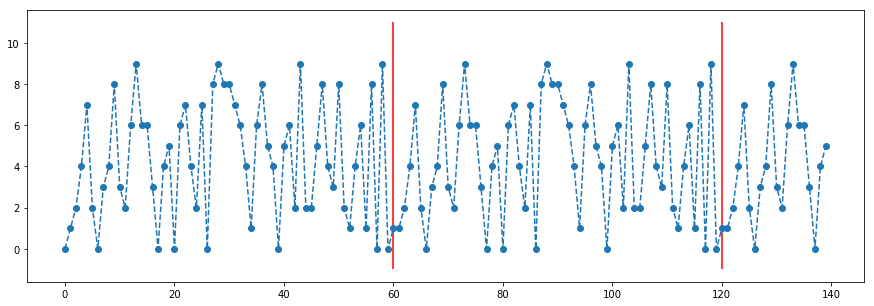

In [415]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 5))
plt.vlines([60, 120], ymin=-1, ymax=11, colors="red")
plt.plot(s, "o--");

### Partial Sum of Fibonacci Numbers

Task. Given two non-negative integers 𝑚 and 𝑛, where 𝑚 ≤ 𝑛, find the last digit of the sum $𝐹_𝑚 + 𝐹_{𝑚+1} + ···+𝐹_𝑛$.

Input Format. The input consists of two non-negative integers 𝑚 and 𝑛 separated by a space.

Constraints. $0 ≤ 𝑚 ≤ 𝑛 ≤ 10^{18}$.

Output Format. Output the last digit of $𝐹_𝑚 + 𝐹_{𝑚+1} + · · · + 𝐹_𝑛$.

In [430]:
def fibonacci_partial_sum(from_, to):
    
    from_ = from_%60
    to = to%60
    sum = 0

    current = 0
    next  = 1

    for i in range(to + 1):
        if i >= from_:
            sum += current

        current, next = next, current + next

    return sum % 10

In [432]:
fibonacci_partial_sum(10, 200)

2